# Homework 05 - Part B  
Luke Telfer  
2020-09-23


## Part A.  

Finish the rabbit ears workshop we started in class on Wednesday.

- Compare types of t-tests
- Compare variances
- Export dataframe as a .csv file


### Load packages and import data:

In [1]:
library(psych) # loads 'psych' library
library(pastecs) # loads 'pastecs' library
rabbitEars <- read.csv('rabbit_ears.csv') # imports data

### Check the data using a variety of mechanisms:

In [3]:
print(rabbitEars) # prints the data table

  rabbit left right difference
1      1 10.5  11.0        0.5
2      2 11.1  11.1        0.0
3      3 10.3  10.7        0.4
4      4 11.4  11.3       -0.1
5      5  9.9  11.0        1.1
6      6 10.1  10.6        0.5
7      7 10.2  10.6        0.4


In [6]:
str(rabbitEars) # displays the internal structure of an R object

'data.frame':	7 obs. of  4 variables:
 $ rabbit    : int  1 2 3 4 5 6 7
 $ left      : num  10.5 11.1 10.3 11.4 9.9 10.1 10.2
 $ right     : num  11 11.1 10.7 11.3 11 10.6 10.6
 $ difference: num  0.5 0 0.4 -0.1 1.1 0.5 0.4


In [9]:
stat.desc(rabbitEars) # provides descriptive statistics

,rabbit,left,right,difference
nbr.val,7.0000000,7.00000000,7.00000000,7.0000000
nbr.null,0.0000000,0.00000000,0.00000000,1.0000000
nbr.na,0.0000000,0.00000000,0.00000000,0.0000000
min,1.0000000,9.90000000,10.60000000,-0.1000000
max,7.0000000,11.40000000,11.30000000,1.1000000
range,6.0000000,1.50000000,0.70000000,1.2000000
sum,28.0000000,73.50000000,76.30000000,2.8000000
median,4.0000000,10.30000000,11.00000000,0.4000000
mean,4.0000000,10.50000000,10.90000000,0.4000000
SE.mean,0.8164966,0.20816660,0.10235326,0.1480026


### Is the mean of the LEFT ear different than 10.9?

Write the statistical null: **mu = 10.9**  
What is the t-critical value? **t-critical = 2.447**  
Is abs(t) larger or smaller than t-critical? **smaller**  
Can you reject the null? **no**

In [11]:
t.test(rabbitEars$left, mu=10.9) # one sample t-test for the left ear


	One Sample t-test

data:  rabbitEars$left
t = -1.9215, df = 6, p-value = 0.103
alternative hypothesis: true mean is not equal to 10.9
95 percent confidence interval:
  9.990635 11.009365
sample estimates:
mean of x 
     10.5 


### Is the mean of the RIGHT ear different than 10.5?

Write the statistical null: **mu = 10.5**  
What is the t-critical value: **t-critical = 2.447**  
Is abs(t) larger or smaller than t-critical? **larger**  
Can you reject the null? **yes**  
Right ear SEM: **0.102**  
Left ear SEM: **0.208**  

**Look at the SEM for the left and right ears – what do you notice? How did that affect the outcome of these tests?**

The left ear SEM is more than double the right ear SEM. This means that the left ear has a wider confidence interval, which extends past the mean of the right ear sample.  Because the right ear SEM is much lower, the confidence interval is narrower and does not include the mean of the left ear.


In [13]:
t.test(rabbitEars$right, mu=10.5) # one sample t-test for the right ear


	One Sample t-test

data:  rabbitEars$right
t = 3.908, df = 6, p-value = 0.00791
alternative hypothesis: true mean is not equal to 10.5
95 percent confidence interval:
 10.64955 11.15045
sample estimates:
mean of x 
     10.9 


### Is the DIFFERENCE between the right and left ears different from zero?

What kind of experimental design is this? **comparative mensurative**  
Write the statistical null: **mu = 0**  
What is the t-critical value? **t-critical = 2.447**  
Is abs(t) larger or smaller than t-critical? **larger**  
Can you reject the null? **yes**  

In [16]:
t.test(rabbitEars$difference) # one sample t-test for the difference between right and left ears


	One Sample t-test

data:  rabbitEars$difference
t = 2.7027, df = 6, p-value = 0.03545
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.03785075 0.76214925
sample estimates:
mean of x 
      0.4 


In [17]:
t.test(rabbitEars$right, rabbitEars$left, paired=TRUE) # paired t-test between left and right ears


	Paired t-test

data:  rabbitEars$right and rabbitEars$left
t = 2.7027, df = 6, p-value = 0.03545
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03785075 0.76214925
sample estimates:
mean of the differences 
                    0.4 


### Lastly, compare left ears to right ears without accounting for the fact that they came from the same rabbit (this is a two-sample t-test)

**What do you notice about the outcomes of the t-tests?**

Some of the tests rejected the null, while others failed to reject the null.

**Which analysis is most powerful and correct for this experiment?**

The two-sample t-test was the most powerful (df = 12 > df = 6).   
The paired t-test is the most correct.

**Why?**

The observations are not independent, since each rabbit was measured twice (left ear, right ear).  The two-sample t-test would only be appropriate if the left ear observations were taken from different rabbits than the right ear observations.

**Note:**

The experimental design here is flawed. The farmer should have measured left and right ears prior to the treatment and again after the treatment.  As it stands, this analysis can only determine whether the right ears are longer than the left ears but not whether this difference can be attributed to the treatment

In [22]:
t.test(rabbitEars$right, rabbitEars$left, paired=FALSE, var.equal=TRUE) # two-sample t-test between right and left ears


	Two Sample t-test

data:  rabbitEars$right and rabbitEars$left
t = 1.7244, df = 12, p-value = 0.1103
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1054166  0.9054166
sample estimates:
mean of x mean of y 
     10.9      10.5 


## Part B. 

Do some more work with the cottonwood data set.


### B1. Import, manipulate, and look at your data.

In [31]:
library(psych) # loads 'psych' library
library(pastecs) # loads 'pastecs' library
cottonwood <- read.csv('cottonwood_2013.csv') # import data from .csv

In [26]:
summary(cottonwood) # summary statistics for each series

      Leaf           Age         Length          Width           Fungus      
 Min.   : 1.00   mature:40   Min.   : 3.10   Min.   :1.600   Min.   : 0.000  
 1st Qu.:20.75   sap   :40   1st Qu.: 8.05   1st Qu.:4.750   1st Qu.: 0.000  
 Median :40.50               Median : 9.95   Median :6.150   Median : 2.000  
 Mean   :40.50               Mean   : 9.57   Mean   :6.008   Mean   : 4.737  
 3rd Qu.:60.25               3rd Qu.:11.10   3rd Qu.:7.300   3rd Qu.: 6.250  
 Max.   :80.00               Max.   :18.80   Max.   :9.600   Max.   :35.000  

In [27]:
str(cottonwood) # internal structure

'data.frame':	80 obs. of  5 variables:
 $ Leaf  : int  76 71 27 69 65 35 63 78 79 59 ...
 $ Age   : Factor w/ 2 levels "mature","sap": 2 1 2 1 1 1 1 2 2 1 ...
 $ Length: num  18.8 11.9 14.5 12.2 11.8 ...
 $ Width : num  1.6 9.6 9.2 9.2 8.7 8.5 8.5 8.5 8.5 8.25 ...
 $ Fungus: int  0 21 1 8 1 0 2 1 3 21 ...


In [29]:
stat.desc(cottonwood) # descriptive statistics for each series

,Leaf,Age,Length,Width,Fungus
nbr.val,80.0000000,NA,80.0000000,80.0000000,80.000000
nbr.null,0.0000000,NA,0.0000000,0.0000000,23.000000
nbr.na,0.0000000,NA,0.0000000,0.0000000,0.000000
min,1.0000000,NA,3.1000000,1.6000000,0.000000
max,80.0000000,NA,18.8000000,9.6000000,35.000000
range,79.0000000,NA,15.7000000,8.0000000,35.000000
sum,3240.0000000,NA,765.6000000,480.6500000,379.000000
median,40.5000000,NA,9.9500000,6.1500000,2.000000
mean,40.5000000,NA,9.5700000,6.0081250,4.737500
SE.mean,2.5980762,NA,0.2830658,0.1927882,0.756981


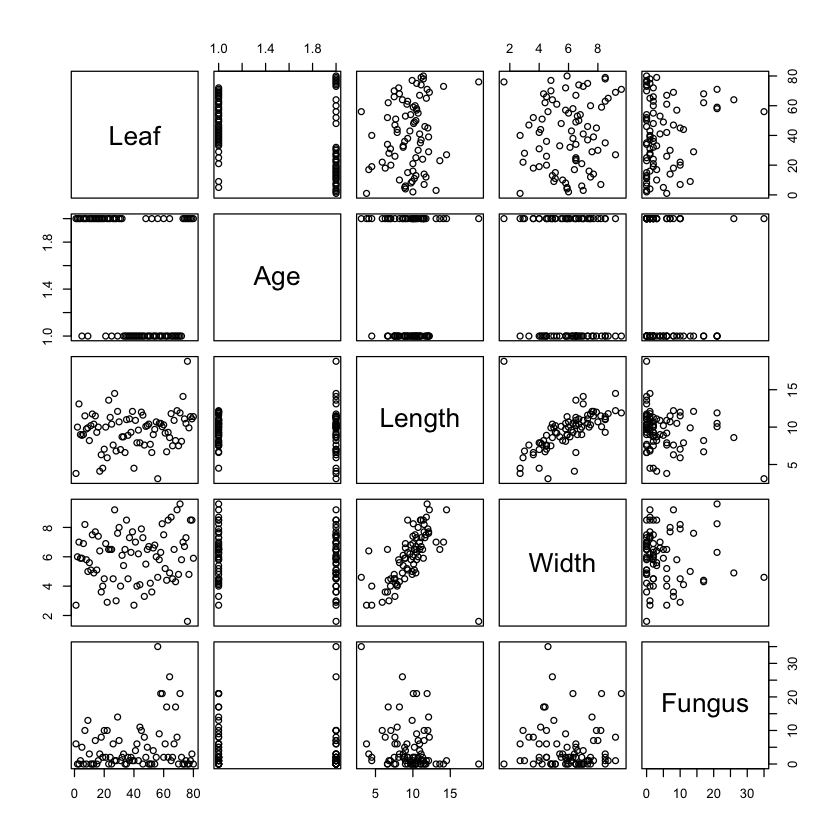

In [30]:
plot(cottonwood) # paired plots between data series for entire dataframe

### B2. Test the statistical hypothesis (H0: mu_length = 7) for sapling trees only and generate descriptive statistics.

In [35]:
saplings <- subset(cottonwood, cottonwood$Age=='sap') # subset data to only include saplings

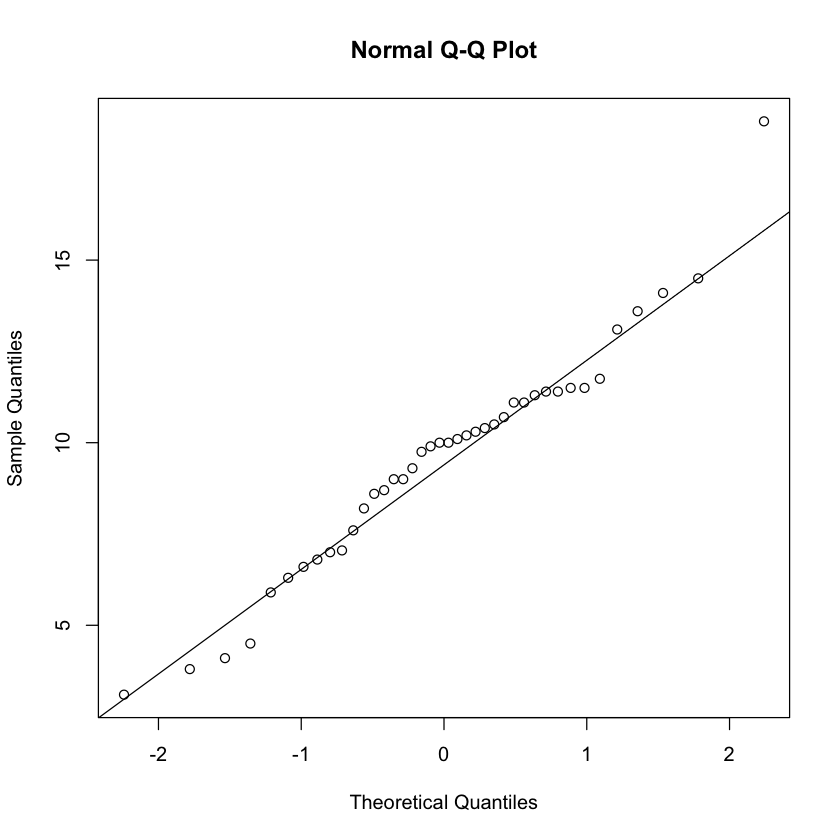

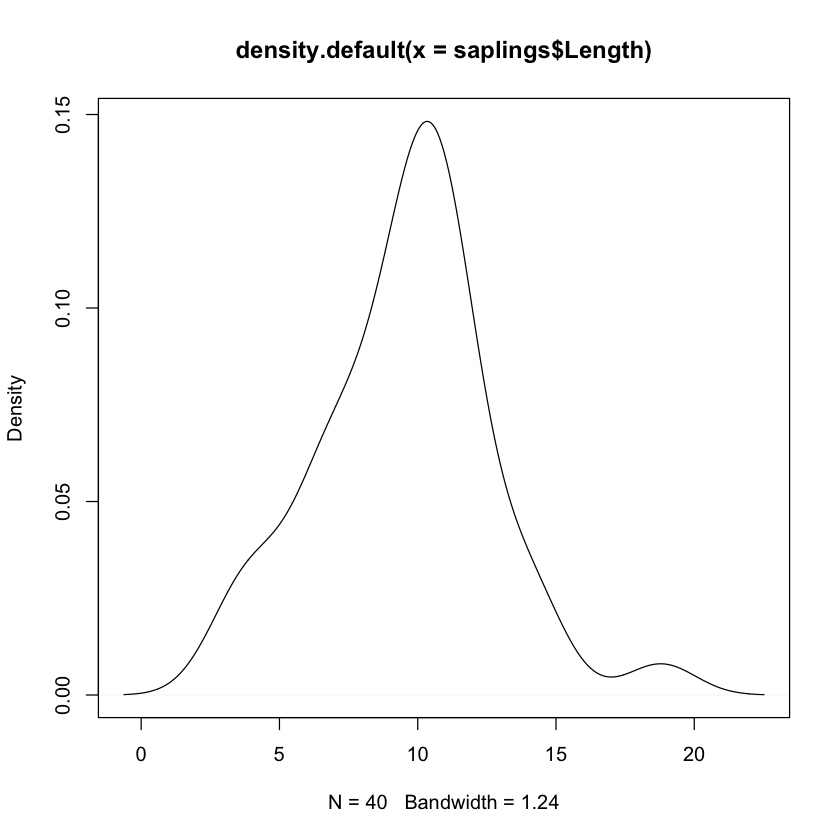

In [46]:
qqnorm(saplings$Length) # quantile-quantile scatter plot to test normality
qqline(saplings$Length) # quantile-quantile fitted line to test normality
plot(density(saplings$Length)) # plot distribution to visually assess normality

In [47]:
shapiro.test(saplings$Length) # H0 is that data is normally distributed, p>0.05 fails to reject


	Shapiro-Wilk normality test

data:  saplings$Length
W = 0.96723, p-value = 0.293


In [48]:
t.test(saplings$Length, mu=7) # one sample t-test; H0 is rejected


	One Sample t-test

data:  saplings$Length
t = 5.1781, df = 39, p-value = 7.129e-06
alternative hypothesis: true mean is not equal to 7
95 percent confidence interval:
  8.562288 10.565212
sample estimates:
mean of x 
  9.56375 


In [50]:
stat.desc(saplings$Length) # descriptive statistics for sapling lengths

nbr.val     nbr.null       nbr.na          min          max        range 
  40.0000000    0.0000000    0.0000000    3.1000000   18.8000000   15.7000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
 382.5500000   10.0000000    9.5637500    0.4951139    1.0014624    9.8055112 
     std.dev     coef.var 
   3.1313753    0.3274213

### B3. Test the H0: mu_length = 10 for saplings

**By hand:**

- mean = 9.564
- SEM = 0.495
- df = 39
- t-critical = 2.021
- CI = (8.56, 10.56)

**What will you have to change in the program?**

mu=7 --> mu=10


In [51]:
t.test(saplings$Length, mu=10) # one sample t-test; fail to reject H0


	One Sample t-test

data:  saplings$Length
t = -0.88111, df = 39, p-value = 0.3837
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
  8.562288 10.565212
sample estimates:
mean of x 
  9.56375 
